# Employee Attrition Analysis - Exploratory Data Analysis

This notebook contains the initial exploratory data analysis for the HR Employee Attrition dataset.

## Objectives
1. Load and inspect the dataset
2. Understand data structure and types
3. Identify missing values and data quality issues
4. Perform univariate and bivariate analysis
5. Visualize key patterns and relationships
6. Identify features correlated with attrition

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (1470, 35)
Number of rows: 1470
Number of columns: 35


## 2. Initial Data Inspection

In [3]:
# Display first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values per column:
Series([], dtype: int64)

Total missing values: 0


## 3. Target Variable Analysis

Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Rate: 16.12%


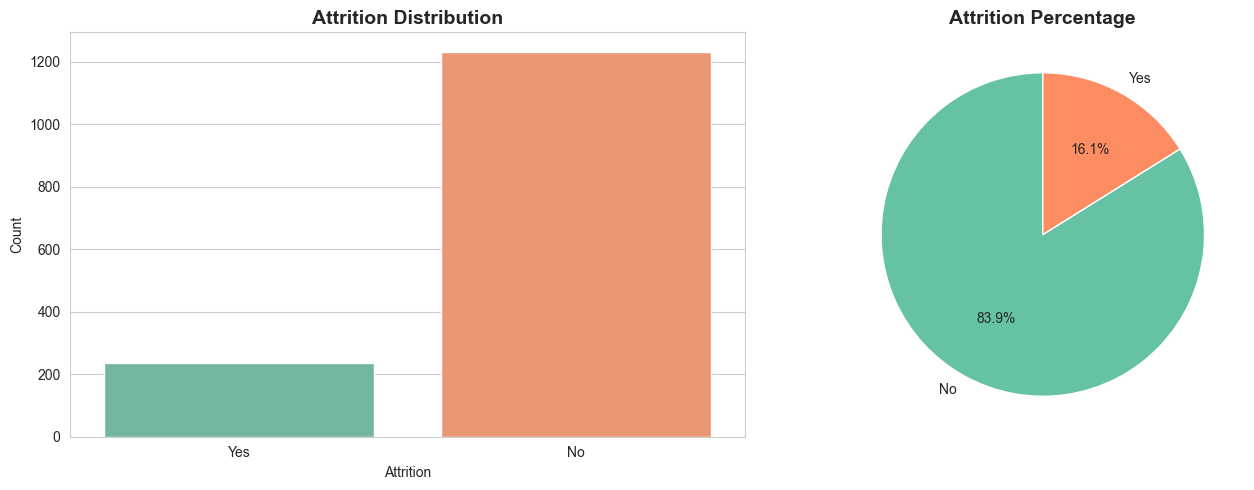

In [7]:
# Attrition distribution
attrition_counts = df['Attrition'].value_counts()
print("Attrition Distribution:")
print(attrition_counts)
print(f"\nAttrition Rate: {(attrition_counts['Yes'] / len(df) * 100):.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Attrition', ax=axes[0], palette='Set2')
axes[0].set_title('Attrition Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'), startangle=90)
axes[1].set_title('Attrition Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Feature Analysis

### 4.1 Numerical Features

In [8]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical columns (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


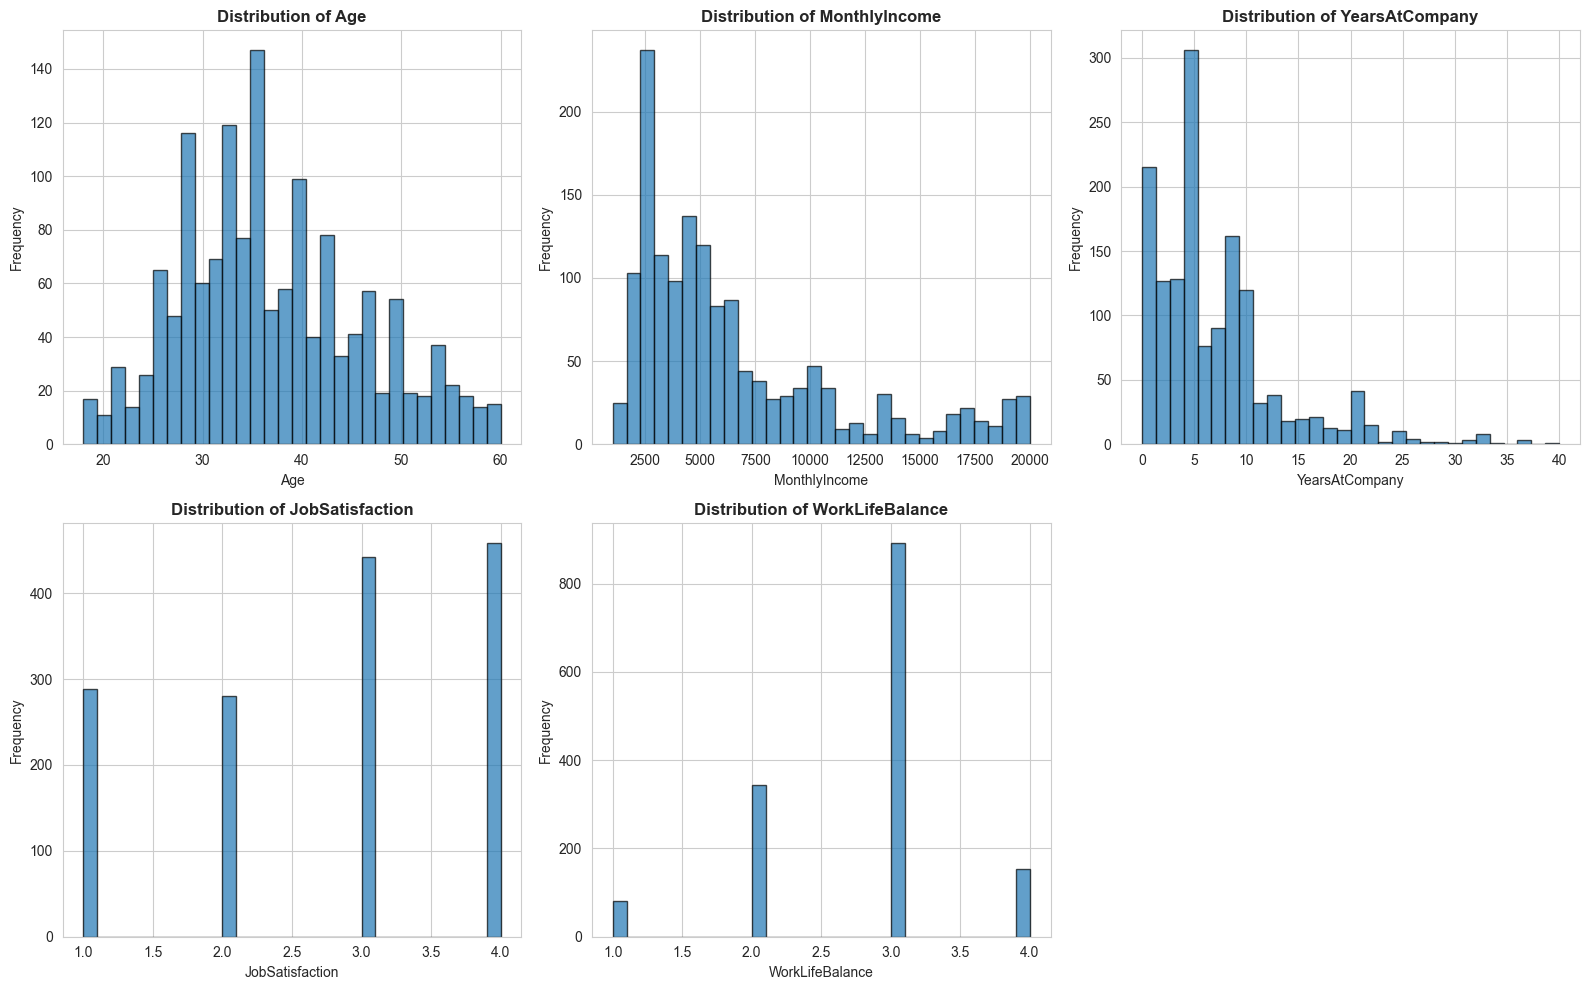

In [9]:
# Distribution of key numerical features
key_numerical = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
available_numerical = [col for col in key_numerical if col in df.columns]

if available_numerical:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(available_numerical):
        if idx < len(axes):
            df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
    
    # Hide unused subplots
    for idx in range(len(available_numerical), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

### 4.2 Categorical Features

In [10]:
# Explore categorical features
for col in categorical_cols:
    if col != 'Attrition':
        print(f"\n{col} - Unique values: {df[col].nunique()}")
        print(df[col].value_counts().head())


BusinessTravel - Unique values: 3
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department - Unique values: 3
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField - Unique values: 6
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: count, dtype: int64

Gender - Unique values: 2
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole - Unique values: 9
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: count, dtype: int64

MaritalStatus - Unique values: 3
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18 - Unique values: 1
Over18
Y    1470
Name: count

## 5. Correlation Analysis

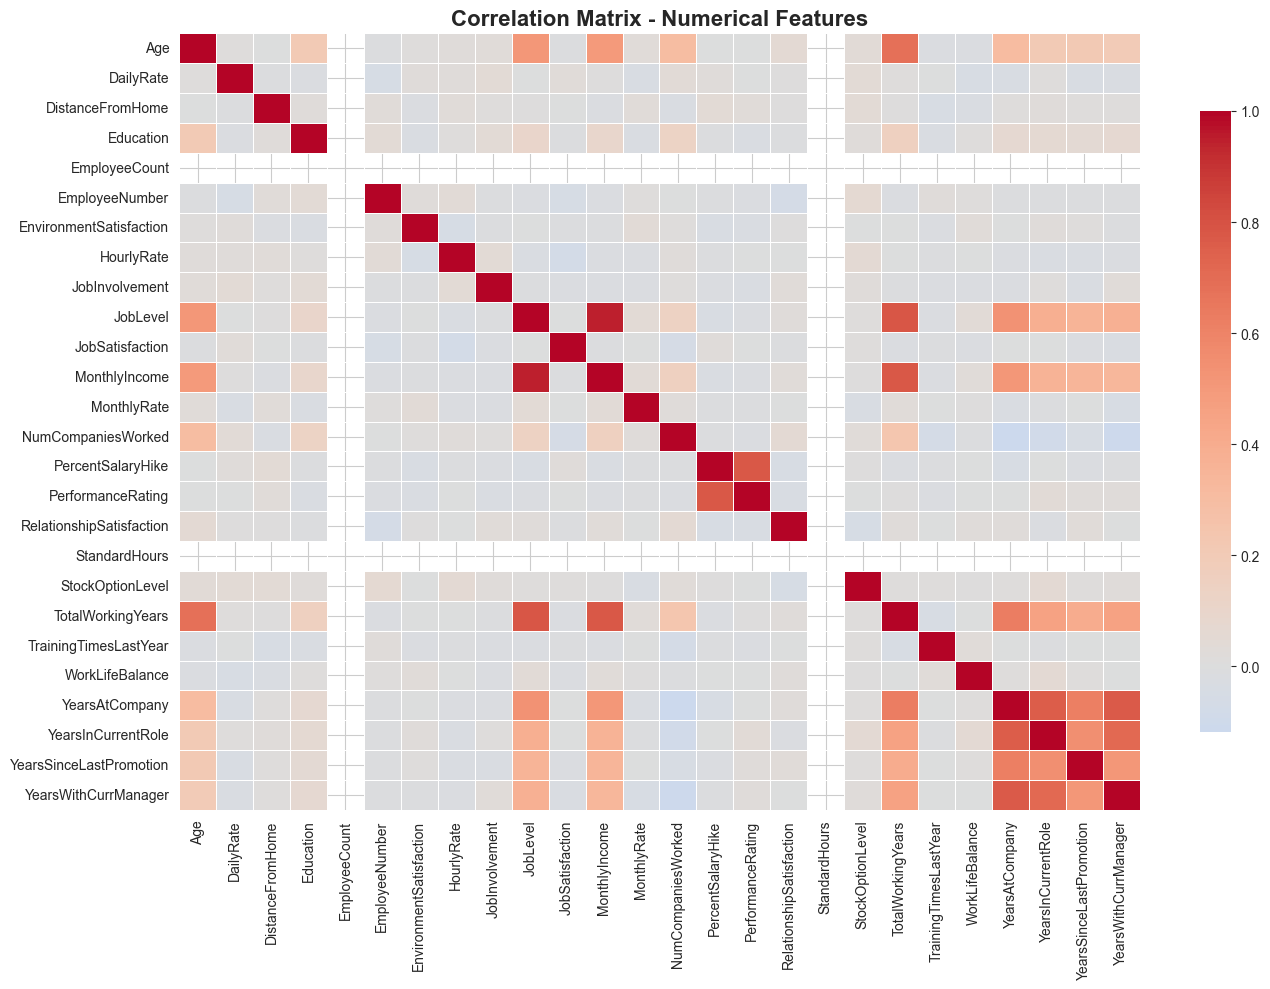

In [11]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Attrition Analysis by Features

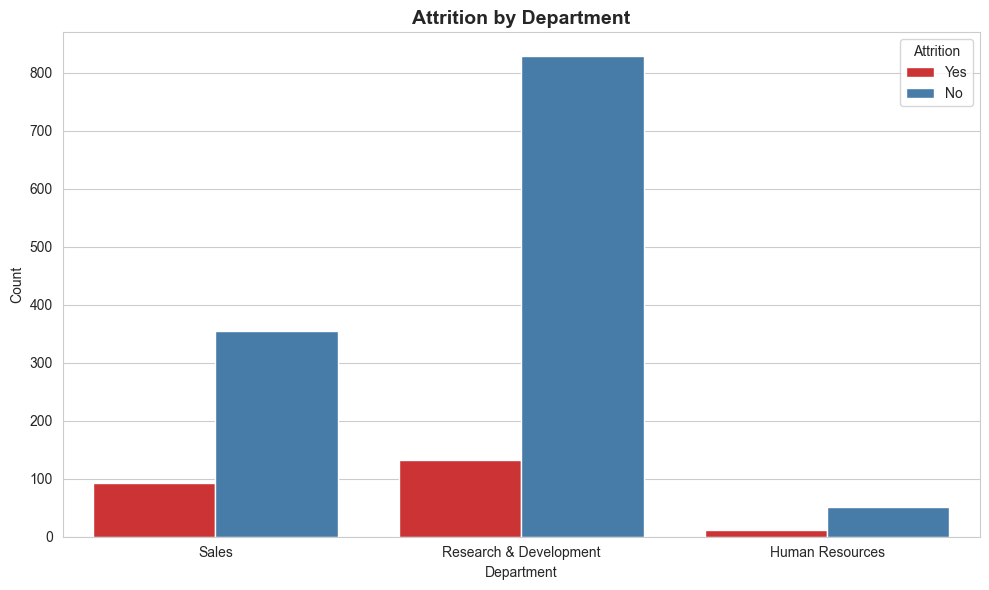

In [12]:
# Attrition by Department (example)
if 'Department' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Department', hue='Attrition', palette='Set1')
    plt.title('Attrition by Department', fontsize=14, fontweight='bold')
    plt.xlabel('Department')
    plt.ylabel('Count')
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

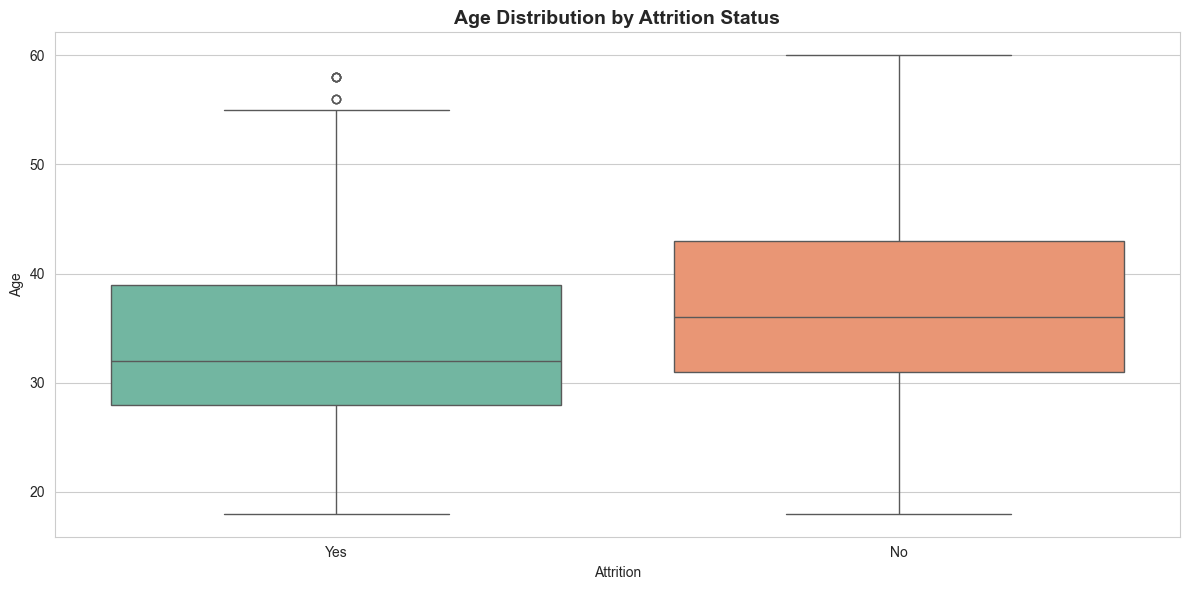

In [13]:
# Age distribution by attrition
if 'Age' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Attrition', y='Age', palette='Set2')
    plt.title('Age Distribution by Attrition Status', fontsize=14, fontweight='bold')
    plt.xlabel('Attrition')
    plt.ylabel('Age')
    plt.tight_layout()
    plt.show()

## 7. Next Steps

- Feature engineering and data preprocessing
- Handle class imbalance
- Build predictive models
- Model evaluation and selection
- Feature importance analysis